In [1]:
# Import Dependencies
import pandas as pd
import requests
from config import weather_api_key
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime

In [2]:
# create a list of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-90.000, 90.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [4]:
# use the citypy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# use the tuple() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

port hawkesbury ca
port elizabeth za
ushuaia ar
longyearbyen sj
kasamwa tz
mar del plata ar
ormara pk
saint-philippe re
walvis bay na
tumannyy ru
port elizabeth za
knysna za
khipro pk
aswan eg
kharp ru
dolbeau ca
mitu co
bredasdorp za
ushuaia ar
la primavera co
lasa cn
los llanos de aridane es
pangnirtung ca
punta arenas cl
carnarvon au
mauriti br
talnakh ru
port said eg
bitkine td
narsaq gl
sakakah sa
brae gb
hermanus za
cape town za
hermanus za
tashtagol ru
tasiilaq gl
eyl so
cape town za
port elizabeth za
dakar sn
ushuaia ar
vyartsilya ru
makinsk kz
marcona pe
nanortalik gl
ushuaia ar
east london za
yar-sale ru
damietta eg
honningsvag no
port alfred za
ushuaia ar
lincoln ar
punta arenas cl
jamestown sh
mar del plata ar
rzhaksa ru
korla cn
jamestown sh
belushya guba ru
hamilton bm
punta arenas cl
walvis bay na
namibe ao
storforshei no
hermanus za
bredasdorp za
rio gallegos ar
itupiranga br
ribeira grande pt
bambous virieux mu
ariquemes br
hermanus za
hermanus za
belushya guba ru
ribe

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


602

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=735b3eb425d194bf44292dcc8730177d


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 40.32,
  'feels_like': 40.32,
  'temp_min': 32.61,
  'temp_max': 45.95,
  'pressure': 1019,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 167, 'gust': 7},
 'clouds': {'all': 90},
 'dt': 1636343508,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1636284320,
  'sunset': 1636320634},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [9]:
# make a get request for city weather
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# retrieve text of get request 
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":40.32,"feels_like":40.32,"temp_min":32.61,"temp_max":45.95,"pressure":1019,"humidity":83},"visibility":10000,"wind":{"speed":1.99,"deg":167,"gust":7},"clouds":{"all":90},"dt":1636343508,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1636284320,"sunset":1636320634},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [11]:
# get the JSON text of the get request
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 40.32,
  'feels_like': 40.32,
  'temp_min': 32.61,
  'temp_max': 45.95,
  'pressure': 1019,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 167, 'gust': 7},
 'clouds': {'all': 90},
 'dt': 1636343508,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1636284320,
  'sunset': 1636320634},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather Found.")
else:
    print(f"City Weather Not Found.")
    

City Weather Found.


In [13]:
city_weather

<Response [200]>

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | port hawkesbury
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | kasamwa
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | ormara
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | walvis bay
Processing Record 10 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 11 of Set 1 | knysna
Processing Record 12 of Set 1 | khipro
Processing Record 13 of Set 1 | aswan
Processing Record 14 of Set 1 | kharp
Processing Record 15 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 16 of Set 1 | mitu
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | la primavera
Processing Record 19 of Set 1 | lasa
Processing Record 20 of Set 1 | los llanos de aridane
Processing Record 21 of Set 1 | pangnirtung
Processing Record 22 of Set 1 | punta arenas
Processing Record 

In [16]:
len(cities)

602

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Hawkesbury,CA,2021-11-08 03:56:29,45.6169,-61.3485,45.59,89,1,1.99
1,Port Elizabeth,ZA,2021-11-08 03:56:40,-33.9180,25.5701,59.29,94,0,5.75
2,Ushuaia,AR,2021-11-08 03:55:31,-54.8000,-68.3000,40.66,81,40,5.75
3,Longyearbyen,SJ,2021-11-08 03:55:33,78.2186,15.6401,12.04,79,75,4.61
4,Kasamwa,TZ,2021-11-08 04:03:44,-2.8500,32.4333,65.75,67,75,0.54
5,Mar Del Plata,AR,2021-11-08 03:55:26,-38.0023,-57.5575,57.87,87,0,5.99
6,Ormara,PK,2021-11-08 03:58:21,25.2088,64.6357,80.38,35,0,5.48
7,Saint-Philippe,RE,2021-11-08 03:56:10,-21.3585,55.7679,80.47,77,40,10.11
8,Walvis Bay,NA,2021-11-08 04:00:58,-22.9575,14.5053,53.10,86,4,10.38
9,Knysna,ZA,2021-11-08 04:03:45,-34.0363,23.0471,57.58,93,100,3.49


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1636346354.4019642

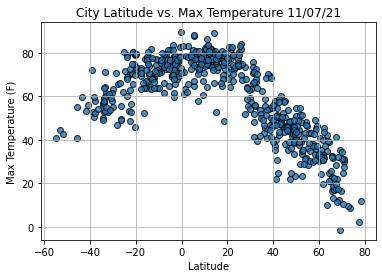

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

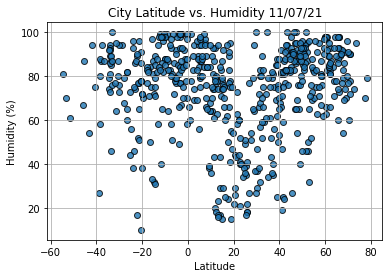

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

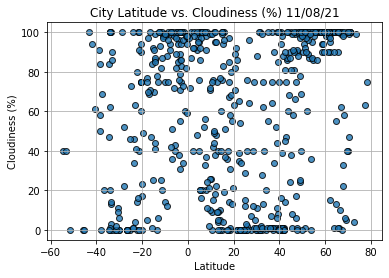

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

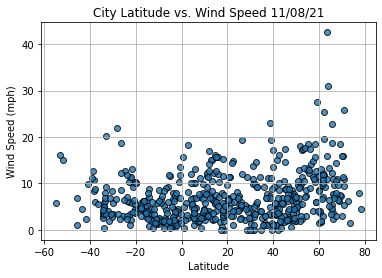

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [40]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [41]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [42]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [43]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

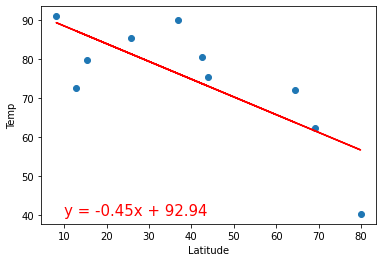

In [47]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [65]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [66]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Hawkesbury,CA,2021-11-08 03:56:29,45.6169,-61.3485,45.59,89,1,1.99
3,Longyearbyen,SJ,2021-11-08 03:55:33,78.2186,15.6401,12.04,79,75,4.61
6,Ormara,PK,2021-11-08 03:58:21,25.2088,64.6357,80.38,35,0,5.48
10,Khipro,PK,2021-11-08 04:03:46,25.8285,69.3772,83.89,18,2,6.02
11,Aswan,EG,2021-11-08 04:00:15,24.0934,32.9070,74.08,34,0,8.25


In [68]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

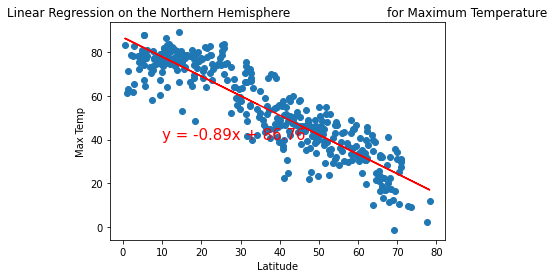

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

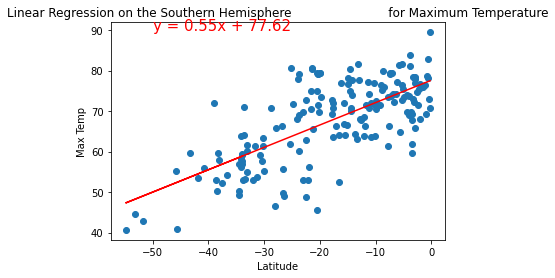

In [72]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

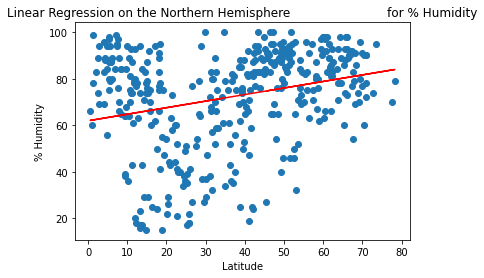

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

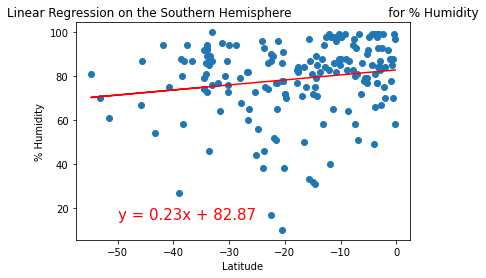

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


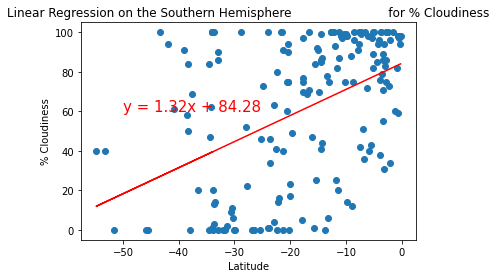

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

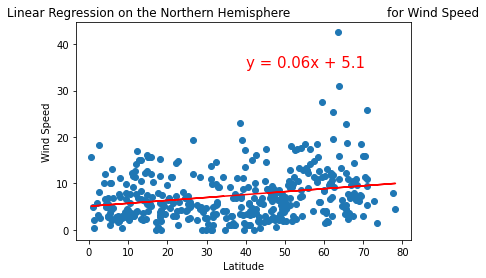

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

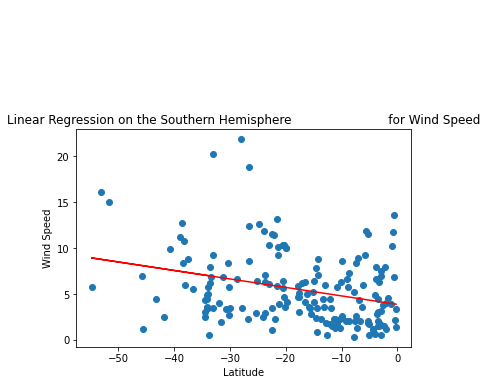

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))